In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random

In [2]:
data=pd.read_csv('sim.txt', header=None, sep=' ')


In [3]:
data.head()

,0,1,2
0,1,7.12308,5.30542
1,1,7.11883,5.75510
2,1,9.41942,8.40456
3,1,6.00670,4.98342
4,1,6.42020,5.61296


In [4]:
#df.rename(columns={"A": "a", "B": "c"})
data=data.rename(columns={0:'Patients', 1 : 'device1', 2 : 'device2'})

In [5]:
data.head()

,Patients,device1,device2
0,1,7.12308,5.30542
1,1,7.11883,5.75510
2,1,9.41942,8.40456
3,1,6.00670,4.98342
4,1,6.42020,5.61296


In [6]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data['device1'])
    data2     = np.asarray(data['device2'])
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

    bland_altman_plot(random(10), random(10))
    plt.title('Bland-Altman Plot')
    plt.show()

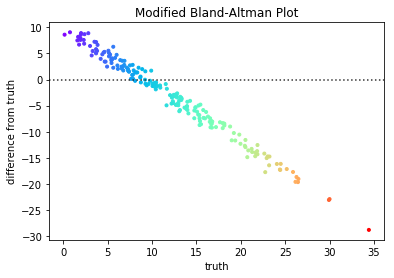

In [7]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)


def modified_bland_altman_plot(predicted, truth):
    predicted = np.asarray(predicted)
    truth = np.asarray(truth) 
    diff = predicted - truth

    fig, ax = plt.subplots()
    ax.scatter(truth, diff, s=9, c=truth, cmap="rainbow")
    ax.set_xlabel('truth')
    ax.set_ylabel('difference from truth')
    ax.set_title("Modified Bland-Altman Plot")

    # Plot a horizontal line at 0
    ax.axhline(0, ls=":", c=".2")

    return ax

x = np.random.rayleigh(scale=10, size=201)
y = np.random.normal(size=len(x))+10-x/10.

modified_bland_altman_plot(y, x)

plt.show()

In [8]:
import pyCompare

ModuleNotFoundError: No module named 'pyCompare'